In [1]:
from common import get_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train, test = get_dataset()

In [3]:
data = []
data_words = []
for k in train.keys():
    num_emails = len(train[k]) + len(test[k])
    data.append((k, num_emails))
    
    word_count = 0
    for fn in train[k]:
        with open(fn, 'r') as fp:
            t = fp.readlines()
        word_count += sum([len(i.split(' ')) for i in t])
    
    for fn in train[k]:
        with open(fn, 'r') as fp:
            t = fp.readlines()
        word_count += sum([len(i.split(' ')) for i in t])
    data_words.append((k, word_count / num_emails))

In [4]:
data.sort(key=lambda x : x[1])
temp = [i[0] for i in data]
data_words.sort(key=lambda x : temp.index(x[0]))

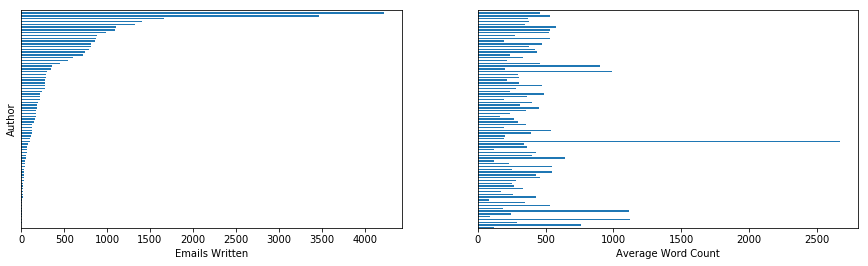

In [5]:
plt.gcf().set_figwidth(15)
plt.subplot(1,2,1)
plt.barh(np.arange(len(data)), [i[1] for i in data], height=0.5)
plt.yticks([])
plt.ylim(0, len(data))
plt.ylabel('Author')
plt.xlabel('Emails Written')

plt.subplot(1,2,2)

plt.barh(np.arange(len(data_words)), [i[1] for i in data_words], height=0.5)
plt.yticks([])
plt.ylim(0, len(data_words))
plt.xlabel('Average Word Count')

plt.savefig('class_imbalance', bbox_inches='tight')

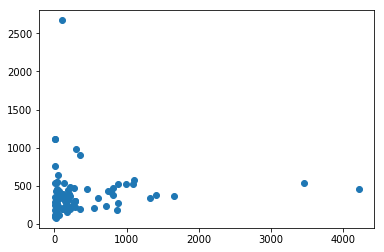

In [6]:
plt.scatter([i[1] for i in data], [i[1] for i in data_words])